# Problem Statement
Given a set of **eight medical characteristics** about a patients, predict whether or not the patient has diabetes. To accomplish this task, we will use a set of real-world data collected on **females 21 years of age** and over collected by a national health institution in the **United States**

# Exploratory Data Analysis

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

## Dataset

We are using the __[Pima Indians diabetes dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)__. The objective with this dataset is to create a binary classification model that predicts whether or not an individual has diabetes based on several medical indicators. The target variable is given as Outcome and takes on a value of 1 if the patient has diabetes and 0 otherwise. This is an imbalanced class problem because there are significantly more patients without diabetes than with diabetes.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/eecs-491/master/assign/project/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visualizations

In [4]:
# matploblib and seaborn for visualizations
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


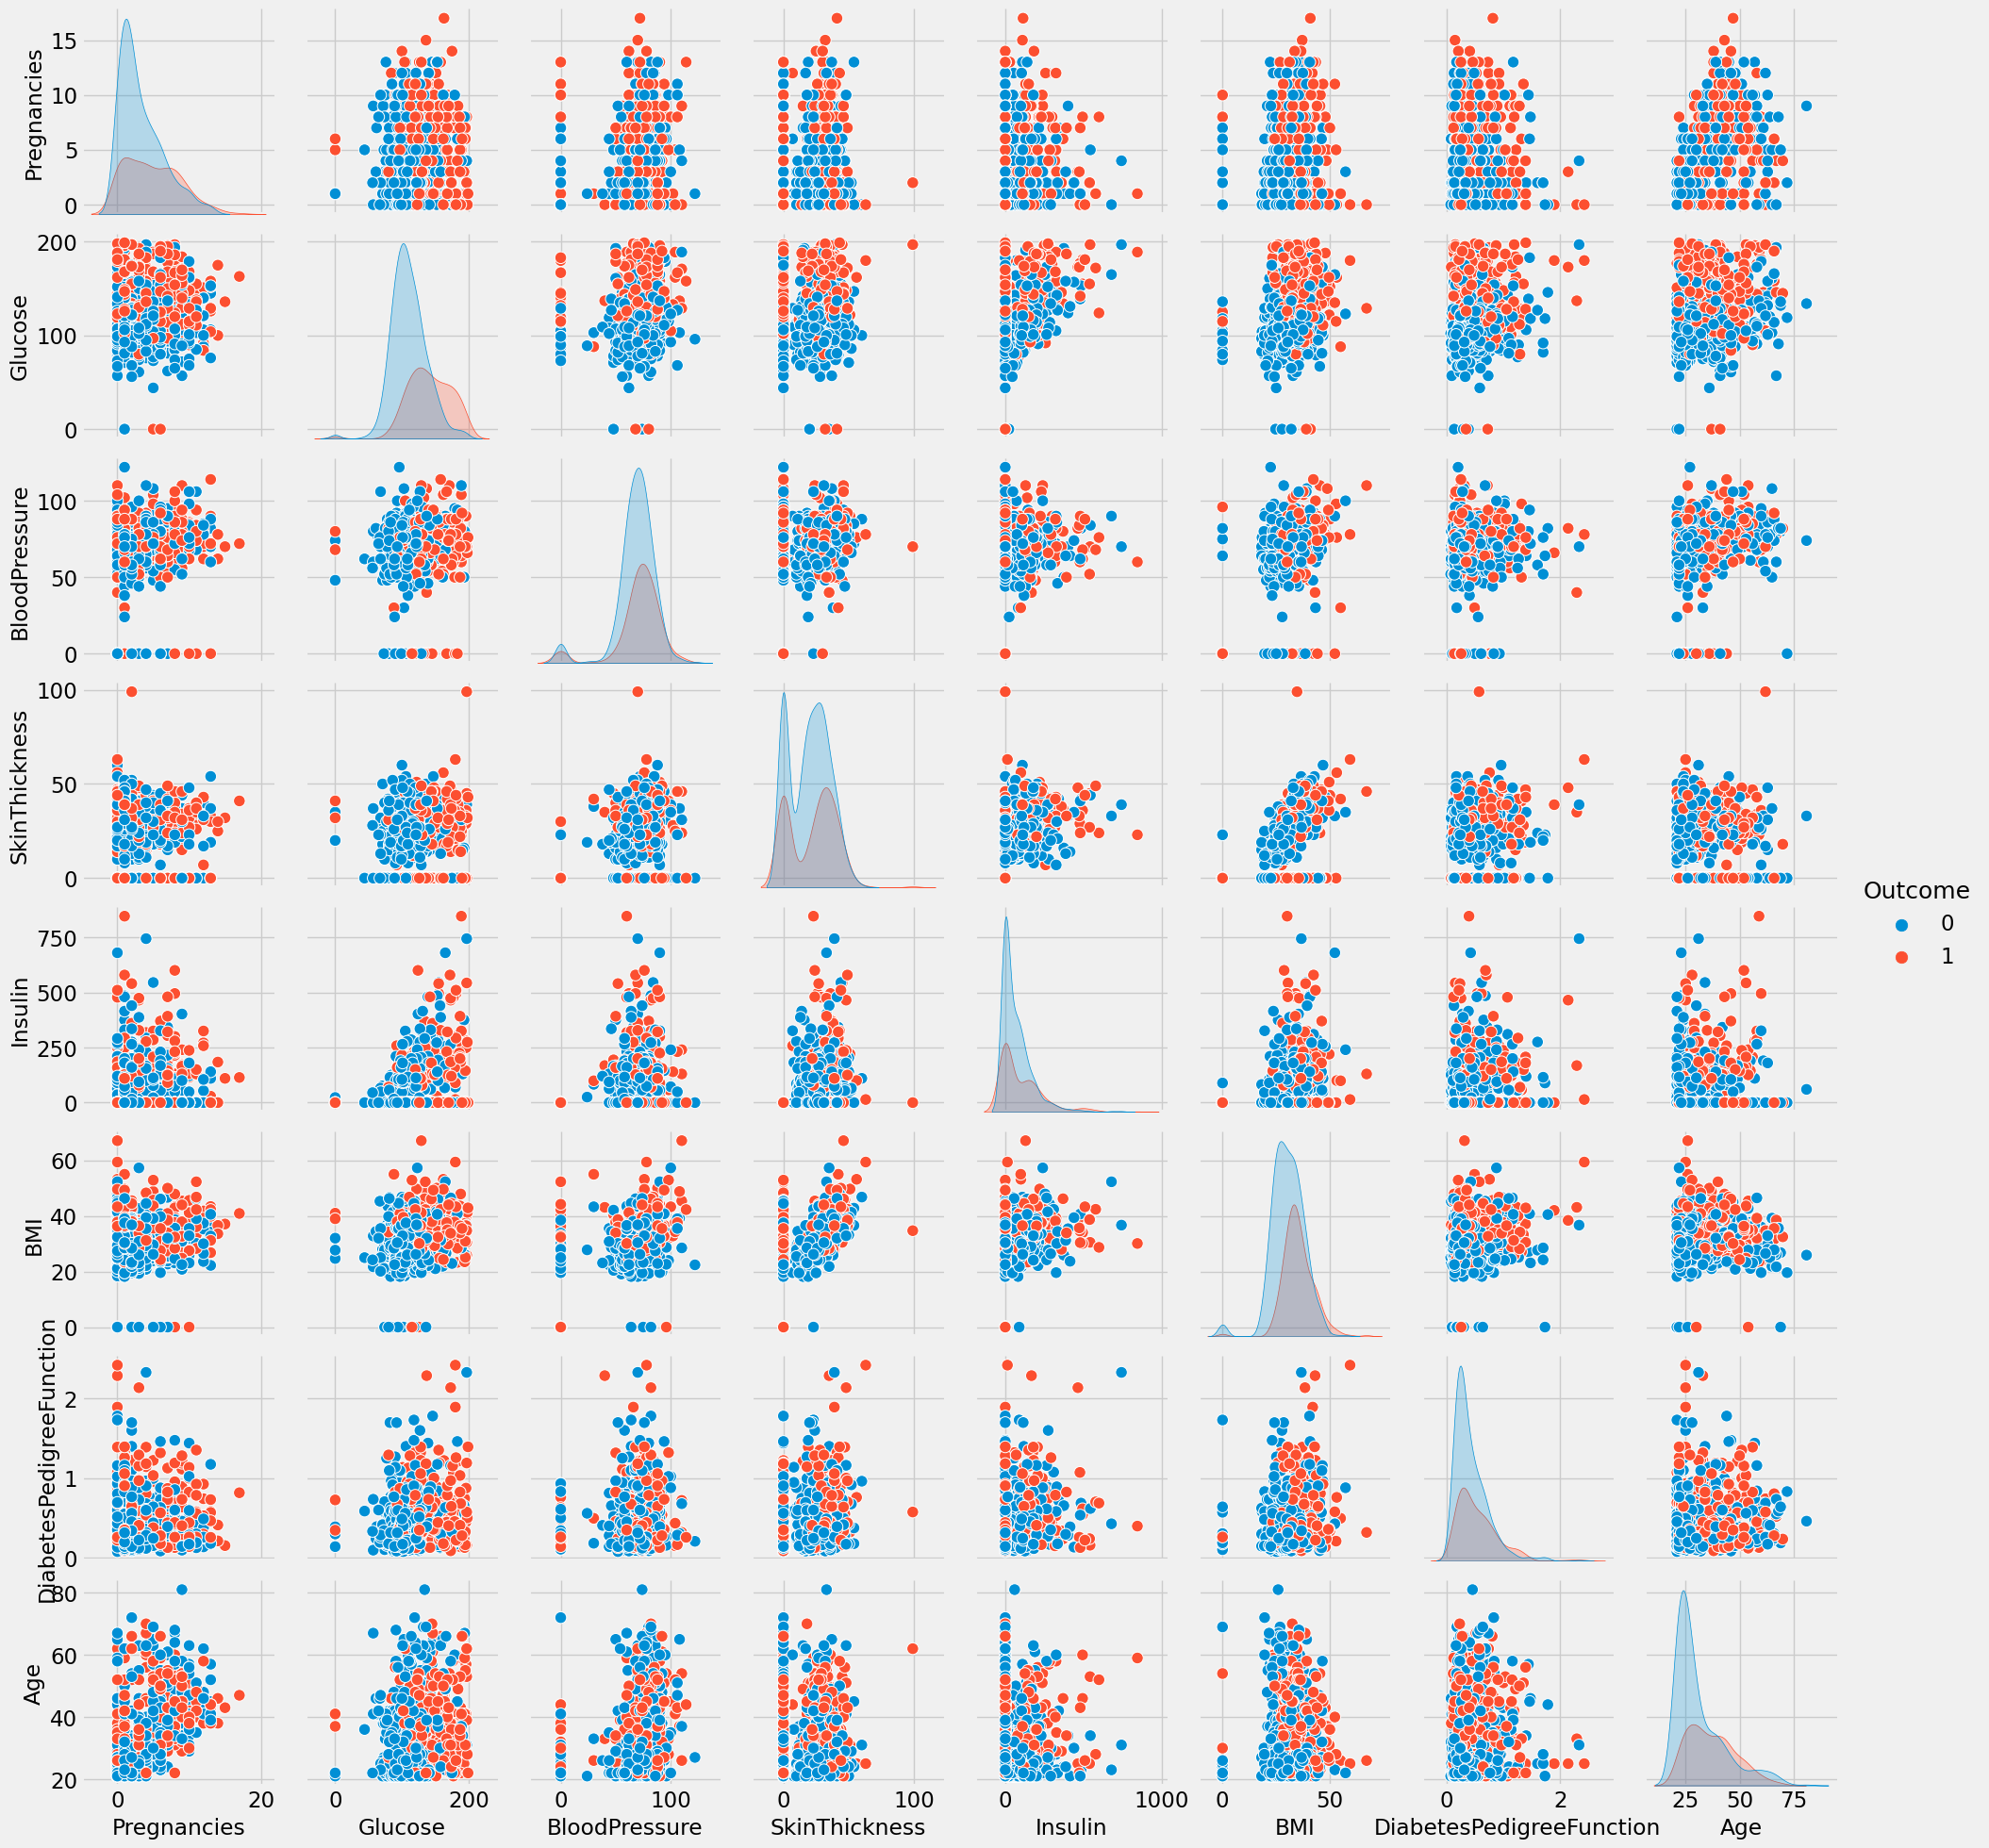

In [5]:
plt.style.use('fivethirtyeight')
sns.pairplot(df, hue = 'Outcome', vars = df.columns[:8], diag_kind = 'kde');

## Impute Missing Values

In [6]:
df['Glucose'] = df['Glucose'].replace({0: df['Glucose'].median()})
df['BloodPressure'] = df['BloodPressure'].replace({0: df['BloodPressure'].median()})
df['SkinThickness'] = df['SkinThickness'].replace({0: df['SkinThickness'].median()})
df['Insulin'] = df['Insulin'].replace({0: df['Insulin'].median()})
df['BMI'] = df['BMI'].replace({0: df['BMI'].median()})

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Correlations

In [8]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

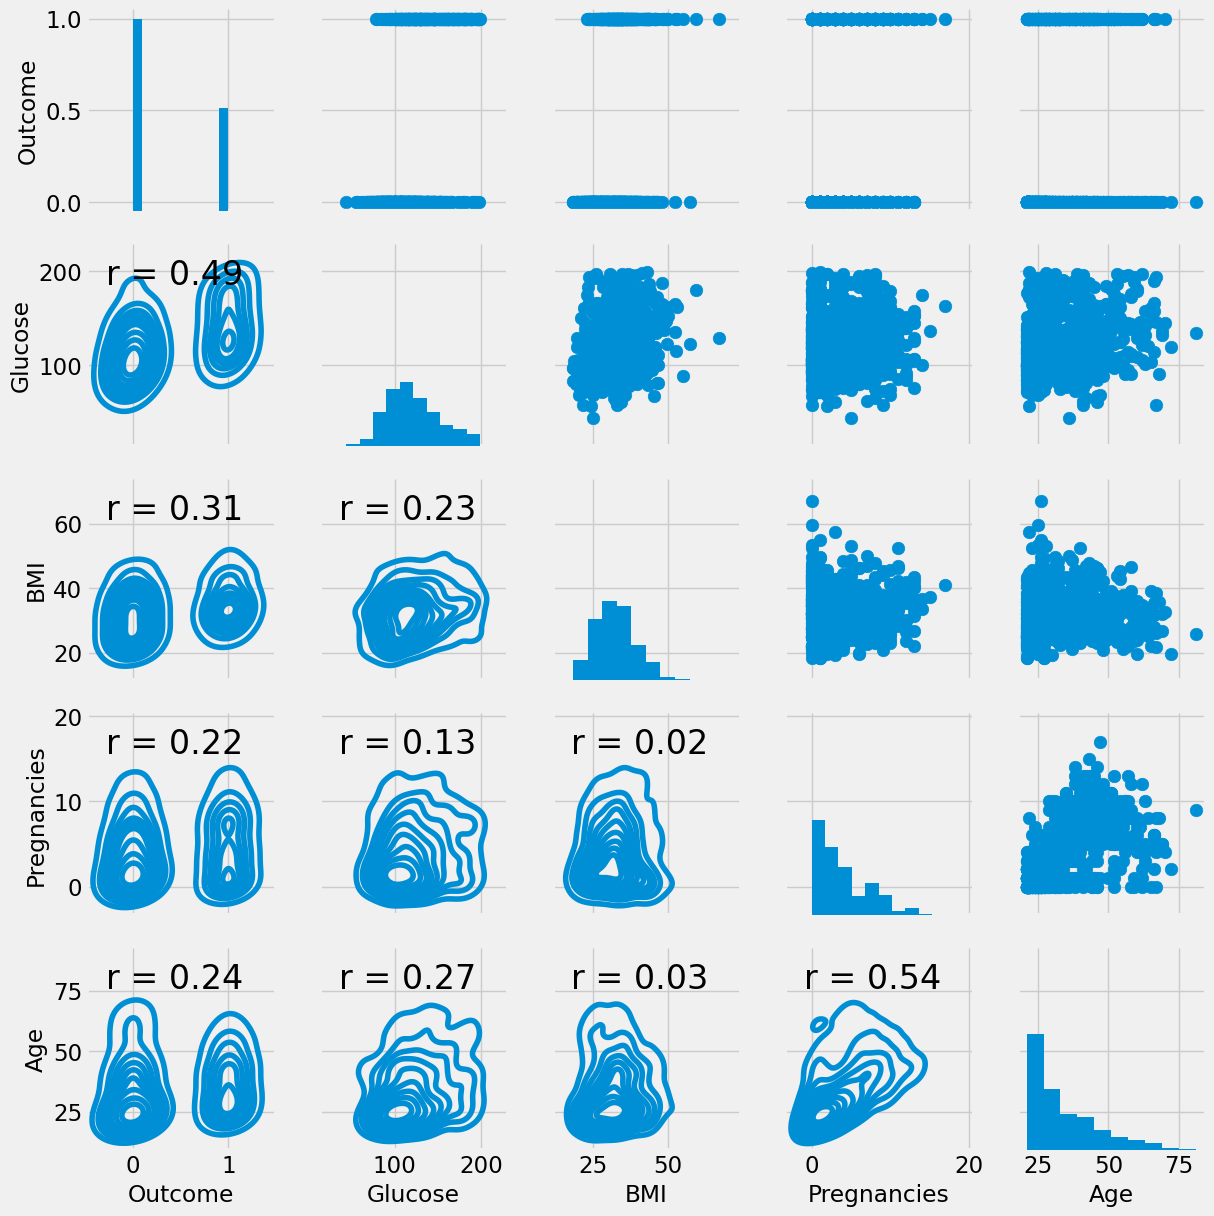

In [9]:
import scipy

# Function to calculate correlation coefficient between two variables
def corrfunc(x, y, **kwgs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .8), xycoords=ax.transAxes,
               size = 24)

# Create a PairGrid
g = sns.PairGrid(data = df,  
                 vars = ['Outcome', 'Glucose', 'BMI', 'Pregnancies', 'Age'])

# Map a scatterplot to the upper triangle
g.map_upper(plt.scatter)

# Map a histogram to the diagonal
g.map_diag(plt.hist)

# Map a kde plot to the lower triangle
g.map_lower(sns.kdeplot)

# Map the correlation coefficient to the lower diagonal
g.map_lower(corrfunc)

# Helper Visualization Functions

In [10]:
# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(12, len(trace.varnames)*1.5),
                      lines={k: v['mean'] for k, v in pm.summary(trace).iterrows()})
    
    plt.rcParams['font.size'] = 12
    # Labels with the mean value
    for i, mn in enumerate(pm.summary(trace)['mean']):
        ax[i, 0].annotate('{:0.2f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (5, 10), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')

In [11]:
# Visualize a confusion matrix as a plot given the confusion matrix
def plot_confusion_matrix(cm, classes = ['No Diabetes', 'Diabetes'],
                          title='Diabetes Confusion matrix',
                          cmap=plt.cm.Reds):
    
    # Display the matrix in text form
    print('Confusion matrix')
    print(cm)
    figsize(8, 8)
    
    # Show the matrix using the imshow functionality
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 20)
    
    # Tick marks show classes
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 12)
    plt.yticks(tick_marks, classes, rotation = 90, size = 12)

    # Formatting for text labels on plot
    fmt1 = 's'
    fmt2 = 'd'
    thresh = cm.max() / 2.
    
    # Four types of classifications
    types = [['True Negative', 'False Positive'],
             ['False Negative', 'True Positive']]
    
    # Add the actual numbers and the types onto the heatmap plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i - 0.05, format(types[i][j], fmt1),
                 horizontalalignment="center", size = 18,
                 color="white" if cm[i, j] > thresh else "black")
        
        plt.text(j, i + 0.15, format(cm[i, j], fmt2),
                 horizontalalignment="center", size = 24,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size = 16)
    plt.xlabel('Predicted Label', size = 16)

In [12]:
# Calculate the accuracy and f1 score of a model
def calc_metrics(predictions, y_test):
    accuracy = np.mean(predictions == y_test)
    f1_metric = f1_score(y_test, predictions)

    print('Accuracy of Model: {:.2f}%'.format(100 * accuracy))
    print('F1 Score of Model: {:.4f}'.format(f1_metric))
# Determine the roc curve and the auc and display
def calc_roc(probs, y_test):
  # Calculate the area under the roc curve
  auc = roc_auc_score(y_test, probs)
  # Calculate metrics for the roc curve
  fpr, tpr, thresholds = roc_curve(y_test, probs)
  
  plt.style.use('bmh')
  plt.figure(figsize = (8, 8))
  
  # Plot the roc curve
  plt.plot(fpr, tpr, 'b')
  plt.xlabel('False Positive Rate', size = 16)
  plt.ylabel('True Positive Rate', size = 16)
  plt.title('Receiver Operating Characteristic Curve, AUC = %0.4f' % auc, 
            size = 18)

## Training and Testing Sets

In [13]:
# Scikit-learn utilities
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve

# Extract the features and the labels
features = df.drop(columns='Outcome')
labels = df.Outcome

# Split into training and testing set using 200 observations for testing
X, X_test, y, y_test = train_test_split(features, labels, test_size=200, random_state = 50)

print(X.shape)
print(X_test.shape)

(568, 8)
(200, 8)


### Naive Baseline
In order to assess if machine learning is even applicable to our problem, we must create a baseline against which to compare our results. For classification, a simple naive baseline is to to predict the most common class in the training data for all testing observations. If our model cannot beat this performance, then machine learning may not be applicable to the task or we should consider a different modeling approach.

In [14]:
y.value_counts()

Outcome
0    373
1    195
Name: count, dtype: int64

In [15]:
# Make naive baseline and evaluate metrics
baseline_pred = [0 for _ in range(len(y_test))]
calc_metrics(baseline_pred, y_test)

Accuracy of Model: 63.50%
F1 Score of Model: 0.0000


Confusion matrix
[[127   0]
 [ 73   0]]


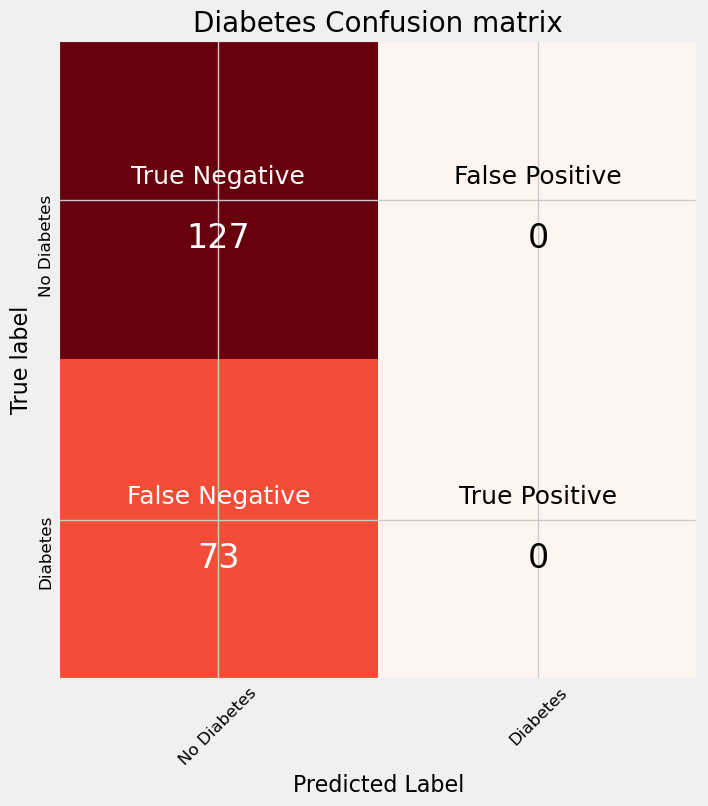

In [16]:
from IPython.core.pylabtools import figsize
import itertools

cm = confusion_matrix(y_test, baseline_pred)
plot_confusion_matrix(cm)

# Evaluate Standard Machine Learning Methods

### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegressionCV

# Make logistic regression model and fit
lr = LogisticRegressionCV(Cs= 20, cv = 3, scoring = 'f1', 
                          penalty = 'l2', random_state = 42)
lr.fit(X, y)

# Make predictions and evaluate
lr_pred = lr.predict(X_test)
calc_metrics(lr_pred, y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy of Model: 74.00%
F1 Score of Model: 0.5667


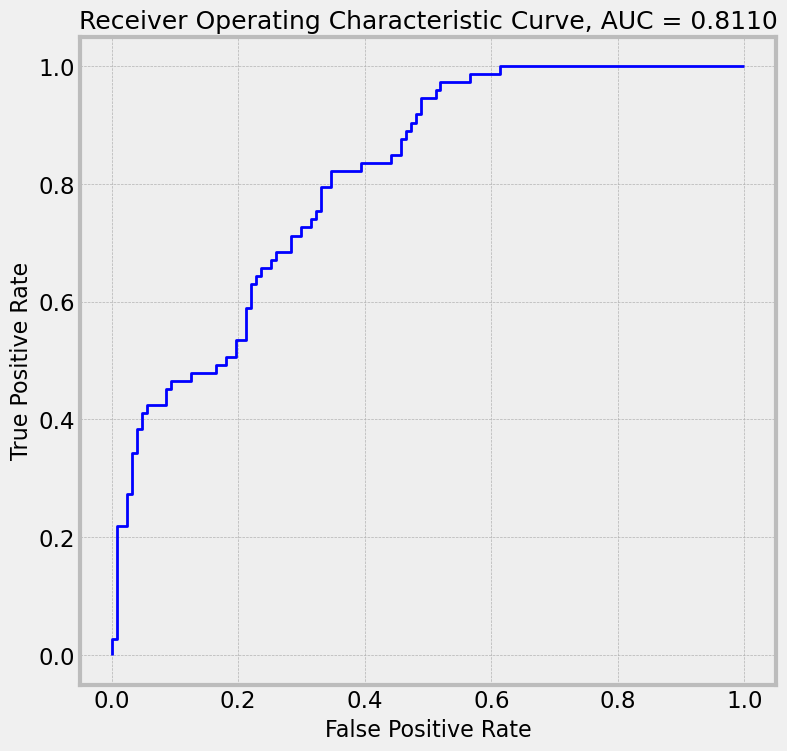

In [18]:
lr_pred_proba = lr.predict_proba(X_test)[:, 1]
calc_roc(lr_pred_proba, y_test)

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit the random forest
rf = RandomForestClassifier(n_estimators=100, random_state = 42)
rf.fit(X, y)

# Evaluate predictions
rf_pred = rf.predict(X_test)
calc_metrics(rf_pred, y_test)

Accuracy of Model: 73.50%
F1 Score of Model: 0.5954


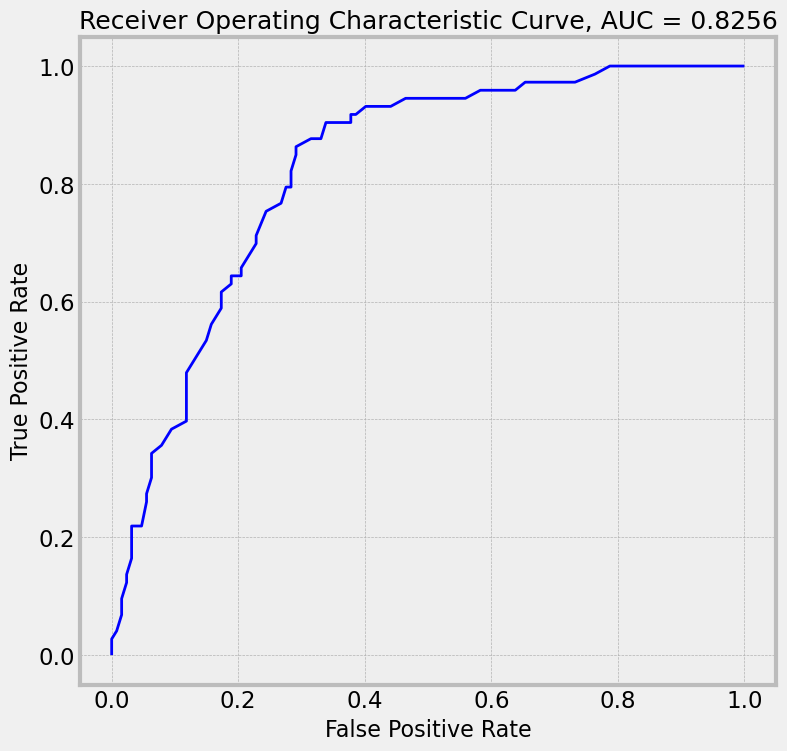

In [20]:
# ROC for random forest
rf_pred_proba = rf.predict_proba(X_test)[:, 1]
calc_roc(rf_pred_proba, y_test)

In [21]:
from sklearn.svm import SVC

# Need to scale features for support vector classifier
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Create support vector classifier and fit
svc = SVC(C = 10, gamma = 0.001, probability=True,
          random_state = 42)
svc.fit(X_scaled, y)

# Make predictions and evaluate
svc_pred = svc.predict(X_test_scaled)
calc_metrics(svc_pred, y_test)

Accuracy of Model: 74.00%
F1 Score of Model: 0.5593


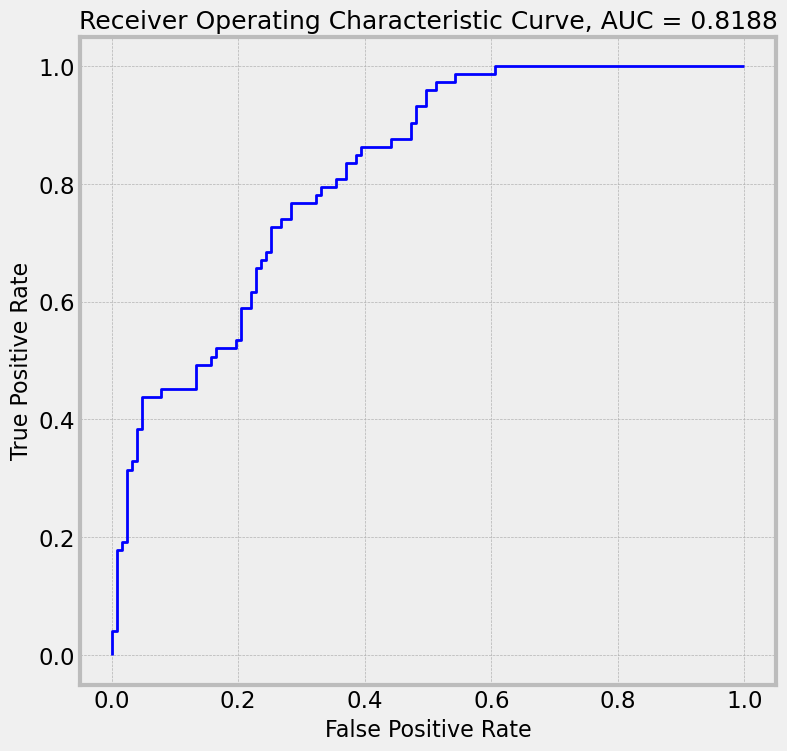

In [22]:
# Predict probabilities and calculate roc and auc
svc_pred_proba = svc.predict_proba(X_test_scaled)[:, 1]
calc_roc(svc_pred_proba, y_test)

## Bayesian Logistic Regression

The first step is to define our model. In the frequentist interpretation of Logistic Regression, the natural log odds of the output, called the logits, are assumed to be generated from a linear combination of the inputs (the features) plus an error term to account for random sampling noise or latent variables. The frequentist interpretation formula is as follows:
$logit = ß_{0} + ß_{1}(Pregnancies) + ß_{2}(Glucose) + ß_{3}(BloodPressure) + ß_{4}(SkinThickness) 
+ ß_{5}(Insulin) + ß_{6}(BMI) + ß_{7}(DiabetesPedigreeFunction) + ß_{8}(Age) + \varepsilon$\
The log odds can then be converted to a proability of the output:\
$p = \frac{1}{1 + e^{-logit}} $\
For our problem, we are interested in finding the probability a patient has diabetes given the medical evidence:\
$p(Diabetes|Features)$\
The objective is to learn the "best" $ß$ values which generally means those that are the most likely given a set of inputs and outputs. Logistic Regression calculates the values of $ß$ using an iterative procedure of Maximum Likelihood Estimation.
In contrast, the Bayesian Framework assumes that the likelihood of the data is drawn from a distribution. For classification with a binary outcome, this is a bernoulli distribution:\
$p(Diabetes|Features) = {\displaystyle \prod_{i=1}^{n} p_{i}^{y}(1-p_{i})^{1-y-{i}}}$
where $y_{i}-1$ if the patient has diabetes and $y_{i} = 0$  if the patient does not have diabetes. $p_{i} = \frac{1}{1 + e^{-logit i}}$ with the **logit** a linear combination of the model parameters.
$$logit\_i = ß_{0} + ß_{1}(Pregnancies) + ß_{2}(Glucose) + ß_{3}(BloodPressure) + ß_{4}(SkinThickness) 
+ ß_{5}(Insulin) + ß_{6}(BMI) + ß_{7}(DiabetesPedigreeFunction) + ß_{8}(Age)$$

The objective is to find the posterior probability distribution of the model parameters given the inputs and outputs.
$$P(ß|X,y) = \frac{P(y|ß,X)P(ß|X)}{P(X,y)}$$\
where $P(y|ß,X)$ is the data likelihood. $P(ß|X)$ is the prior on the parameters, and $P(X,y)$ is a normalization constant so the probability of the parameters sums to one. In reality, calculating the exact posterior for the model parameters is intractable with continuous variables, and so we use Monte Carlo sampling methods. This means that we draw repeated samples from the posterior in order to approximate the posterior. Generally this is done with some form of a Markov Chain Monte Carlo algorithm, in which the next state is dependent only a bounded subset of the current state and past states (depending on the order of the chain). In the Bayesian Framework, the end result of linear regression is not a single point estimate for the "best" model parameters, but rather an entire distribution of potential model parameters representing our uncertainty about the true values.

In the Bayesian method, not only are the log odds assumed to be generated from a distribution, but so are the model parameters. If we have an idea about the parameters, we can encode this in the priors, or we can let the data speak and choose non-informative priors. Usually this means a normal distribution with a wide standard devivation for $ß$.  In the case of infinite data, the priors will be completely washed out by the data likelihood. There are two primary advantages to the Bayesian method:
1. **Priors**:  if we have information about the model parameters, we can inject it into the model
2. **Posterior distributions**: the result is a distribution for the model parameters instead of a point estimate 

We can use the mean of the parameter distributions if we want to obtain a single "most likely" prediction by calculating the log odds and then converting to a probability, but we can also express a range of probabilities. As the amount of training data increases, the uncertainty in the model parameters should decrease. In the case of limited data, Bayesian methods can be a better way to quantify uncertainty because the possible distribution of parameters will be wide and the standard deviation of the log odd distribution will be large. Although frequentist logistic regression can include confidence intervals, Bayesian methods can provide a more inuitive display of uncertainty in the cases of limited data.

The end result of "fitting" the model by drawing samples from the posterior will be a distribution for each 
 model weight. The distribution can be used to make predictions and to examine the effects on the outcome of changing the value of different input variables (sensitivity analysis). First, we will build up the model and sample from the posterior, and then we will thoroughly interpret the modeling results. Additionally, we can make predictions and compare the results to standard machine learning models, although the benefit of Bayesian Methods is not so much in the accuracy, as in the interpretability of the results of the modeling.


### Formula for Logistic Regression

Now on to the details. The `PyMC3` library has a module called `GLM` which implements a function called `GLM.from_formula`. This accepts an R style formula and builds up a model for us. It adds random variables (by default a normal distribution with a large standard deviation) for each of the features, a random variable for the intercept, and a normal distribution by default for the data likelihood. In this case, we need to change the data likelihood from a normal distribution to a Bernoulli distribution because we are using a binary outcome variable. 

In [33]:
# Build up a formula
formula = [' %s + ' % variable for variable in X.columns]
formula.insert(0, '0 +')
formula.insert(0, 'y ~ ')
formula = ' '.join(''.join(formula).split(' ')[:-2])
formula

'y ~ 0 + Pregnancies +  Glucose +  BloodPressure +  SkinThickness +  Insulin +  BMI +  DiabetesPedigreeFunction +  Age'

This follows the R programming language formula syntax where `~` means "is a function of". Here we are stating that `y` is a function of eight variables in a linear combination. In this equation,  `y` represents the log odds of diabetes which we can convert to a probability using the following equation:

$$P(Diabetes | features) = \frac{1}{1 + e^{-y}}$$


## Implementing the Logistic Model

The first model will use all eight features. We create the model using the formula defined above and then draw samples from the posterior using the No-UTurn Sampler (NUTS). This is a variation of the Metropolis-Hastings algorithm. Both of these algorithms fall under the general category of Markov Chain Monte Carlo methods because they sample random values from the posterior with the next value dependent only on the current state (or a bounded subset of previous states). 

The data likelihood is a Bernoulli Variable because it satisfies the following three conditions:

1. Outcome is binary: 0 for does not have diabetes and 1 for has diabetes
2. Trials are independent of each other.
3. The probability of the outcome does not change with each trial. 

If we have some prior knowledge, we can encode that if the priors for the $\beta$ coefficients, or we can use the default priors in PyMC3. The default priors for regressors (the explanatory variables) are normal with the distribution $N(0, 10^{6})$ and the default prior for the Intercept is a flat distribution. In the call to create our model, we will pass in the formula, our training data, and the distribution to use for the response variable, which is a Bernoulli distribution. 

In [24]:
# Create version of the training data with labels
X_with_labels = X.copy()
X_with_labels['y'] = y

In [ ]:
import bambi as bmb

logistic_model = bmb.Model(formula, X_with_labels, family="bernoulli")	

trace_log = logistic_model.fit(draws=5000, chains=2, random_seed = 100)

Modeling the probability that y==1
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]


Output()